# Datetime Index

## Python Datetime Object

In [1]:
from datetime import datetime

In [2]:
my_year = 2020
my_month = 5
my_day = 8
my_hour = 16
my_minute = 20
my_second = 15

In [3]:
my_date = datetime(my_year,my_month,my_day)
my_date

datetime.datetime(2020, 5, 8, 0, 0)

In [4]:
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)
my_date_time

datetime.datetime(2020, 5, 8, 16, 20, 15)

In [5]:
my_date_time.hour

16

## Datetime Arrays with Numpy

In [6]:
import numpy as np

In [7]:
# Create an array from three dates
np.array(['2020-05-07','2020-05-08','2020-05-09'],dtype='datetime64')

array(['2020-05-07', '2020-05-08', '2020-05-09'], dtype='datetime64[D]')

In [8]:
# the dtype listed as 'datetime64[D]'. This tells us that NumPy applied a day-level date precision. If we want we can pass in a different measurement, such as [h] for hour or [Y] for year.
np.array(['2020-05-07','2020-05-08','2020-05-09'],dtype='datetime64[h]')

array(['2020-05-07T00', '2020-05-08T00', '2020-05-09T00'],
      dtype='datetime64[h]')

In [9]:
np.array(['2020-05-07','2020-05-08','2020-05-09'],dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

## Numpy Date Ranges

Just as np.arange(start,stop,step) can be used to produce an array of evenly-spaced integers, we can pass a dtype argument to obtain an array of dates. Remember that the stop date is exclusive.

In [10]:
# An array of dates from 5/1/2020 to 5/30/2020 spaced one week apart
np.arange('2020-05-01','2020-05-30',7, dtype='datetime64[D]')

array(['2020-05-01', '2020-05-08', '2020-05-15', '2020-05-22',
       '2020-05-29'], dtype='datetime64[D]')

In [11]:
# By omitting the step value we can obtain every value based on the precision.
# An array of dates for every year from 2001 to 2020
np.arange('2001','2020',dtype='datetime64[Y]')

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'], dtype='datetime64[Y]')

## Pandas Datetime Index

In [12]:
import pandas as pd

In [13]:
# The simplest way to build a DatetimeIndex is with the pd.date_range() method:
# The week of May 8th, 2020
idx = pd.date_range('5/8/2020',periods=7, freq='D')
idx

DatetimeIndex(['2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14'],
              dtype='datetime64[ns]', freq='D')

In [14]:
# Five Fridays starting from May 8th
idx = pd.date_range('5/8/2020',periods=5, freq='W-FRI')
idx

DatetimeIndex(['2020-05-08', '2020-05-15', '2020-05-22', '2020-05-29',
               '2020-06-05'],
              dtype='datetime64[ns]', freq='W-FRI')

In [15]:
# Or to convert text indext with the pd.to_datetime() method:
idx = pd.to_datetime(['May 07, 2020','5/8/2020','09-May-2020',None])
idx

DatetimeIndex(['2020-05-07', '2020-05-08', '2020-05-09', 'NaT'], dtype='datetime64[ns]', freq=None)

In [16]:
# Or to convert a list or an array of datetime objects with the pd.DatetimeIndex() method:
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [17]:
# Convert to an index
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

even though the dates came into pandas with a day-level precision, pandas assigns a nanosecond-level precision with the expectation that we might want this later on.

## Pandas Datetime Analysis

In [18]:
# First, create some random data
data = np.random.randn(5,2)
cols = ['A','B']
idx = pd.date_range('5/8/2020',periods=5, freq='W-FRI')
print(data)

[[ 0.65681037  0.14389519]
 [-0.04001836 -0.69858026]
 [-0.77278555  1.4462743 ]
 [-0.94472774 -0.73796825]
 [ 0.54753506 -1.19825494]]


In [19]:
# Create a dataframe with our random data, our date index, and our columns
df = pd.DataFrame(data,idx,cols)
df

,A,B
2020-05-08,0.656810,0.143895
2020-05-15,-0.040018,-0.698580
2020-05-22,-0.772786,1.446274
2020-05-29,-0.944728,-0.737968
2020-06-05,0.547535,-1.198255


In [20]:
df.index

DatetimeIndex(['2020-05-08', '2020-05-15', '2020-05-22', '2020-05-29',
               '2020-06-05'],
              dtype='datetime64[ns]', freq='W-FRI')

In [21]:
# Latest date value
df.index.max()

Timestamp('2020-06-05 00:00:00', freq='W-FRI')

In [23]:
# Earliest date value
df.index.min()

Timestamp('2020-05-08 00:00:00', freq='W-FRI')

In [24]:
# Latest date index location
df.index.argmax()

4

In [25]:
# Earliest date index location
df.index.argmin()

0

# Time Resampling

In [26]:
%matplotlib inline

In [27]:
# Easier way of doing following:
# df = pd.read_csv('../Data/starbucks.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date',inplace=True)
df = pd.read_csv('../Data/starbucks.csv', index_col='Date', parse_dates=True)

In [28]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [29]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

## resample()

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [31]:
# Yearly Means, Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function 
# (in this case we calculate the mean), and reports the result as the last day of that year.
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


## Custom Resampling Functions

In [32]:
def last_day(entry):
    """
    Returns the last instance of the period, regardless of sampling rate.
    """
    if len(entry):
        return entry[-1]

In [33]:
df.resample(rule='A').apply(last_day)

,Close,Volume
Date,,
2015-12-31,56.7513,4960875
2016-12-31,53.2731,8344508
2017-12-31,56.1288,5365646
2018-12-31,64.4000,7690183


## Plotting

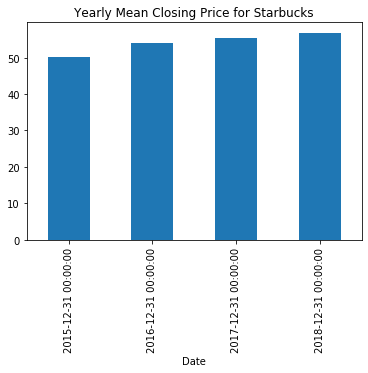

In [34]:
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks')

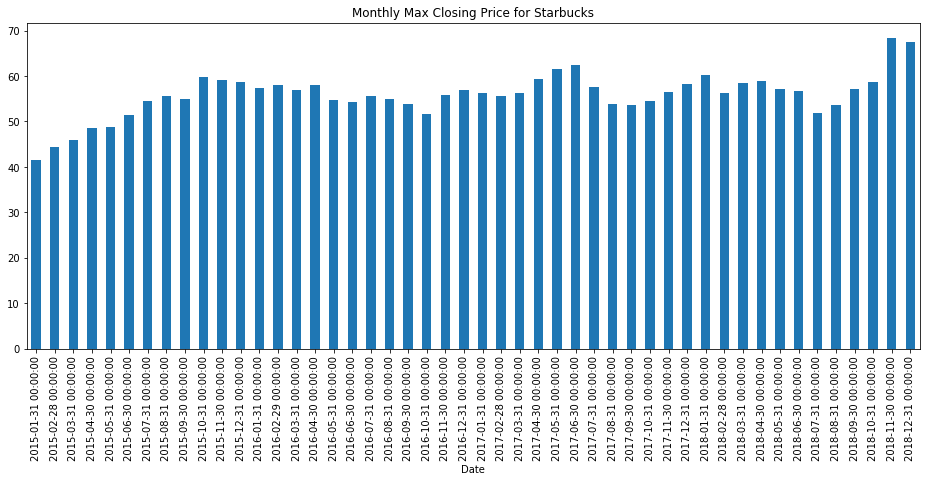

In [35]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title);

# Time Shifting

In [36]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [37]:
# You will lose that last piece of data that no longer has an index
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


## Shifting based on Time Series Frequency Code

In [38]:
# We can choose to shift index values up or down without realigning the data by passing in a freq argument.
# This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end.
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Time Rolling and Expanding

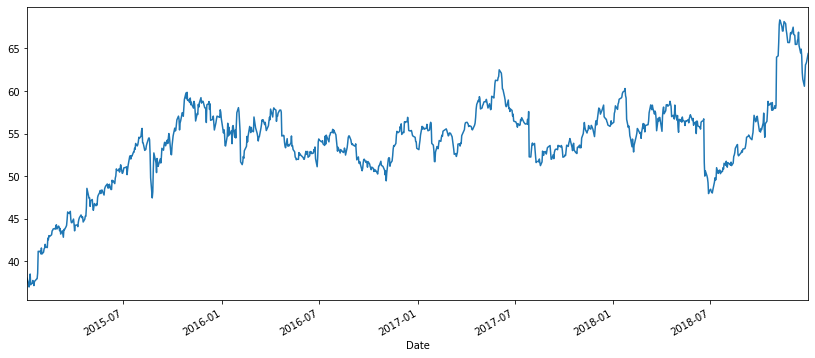

In [42]:
df['Close'].plot(figsize=(14,6)).autoscale(axis='x',tight=True)

In [43]:
# 7-day rolling mean, will lose the first 6 datapoints
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


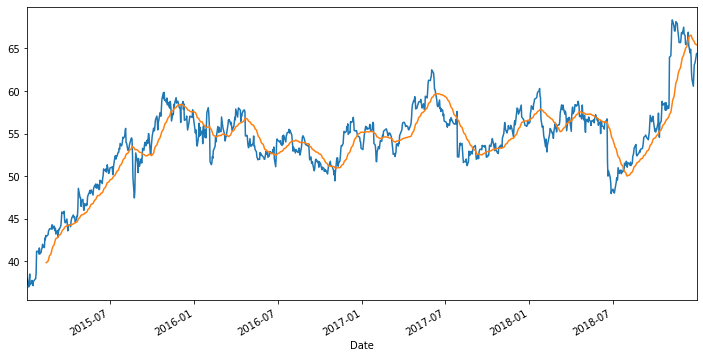

In [45]:
df['Close'].plot(figsize=(12,6)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();

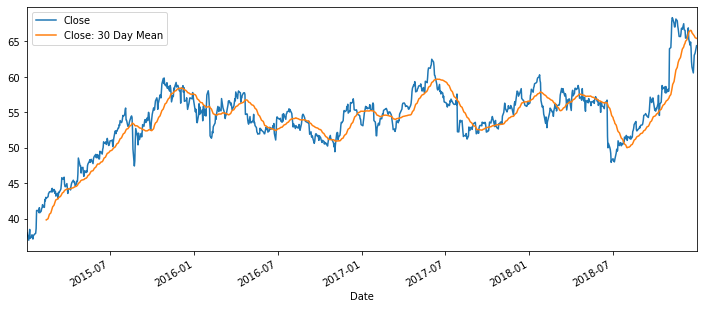

In [46]:
# make a rolling mean column so pandas automatically add a legend
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

## Expanding

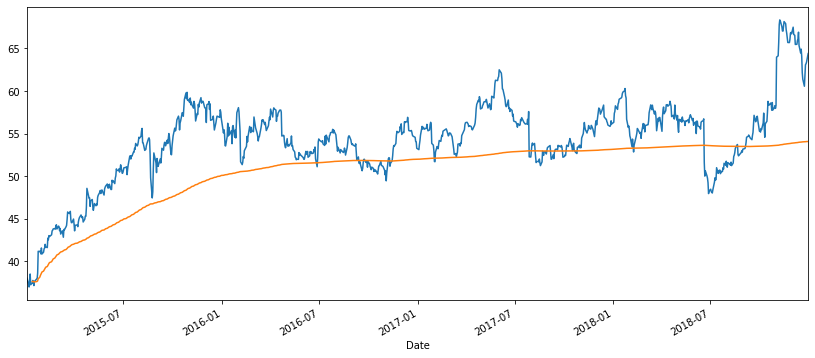

In [49]:
# instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

# Optional: specify a minimum number of periods to start from
df['Close'].expanding(min_periods=7).mean().plot(figsize=(14,6));

# Visualizing Time Series Data

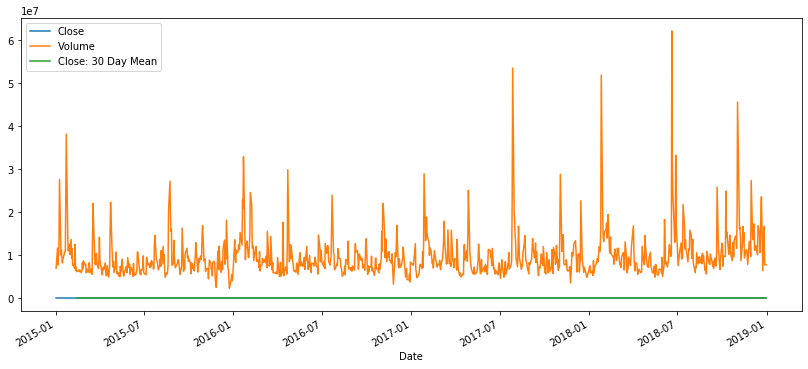

In [52]:
# Not very helpful plot due to the difference in y-values
df.plot(figsize=(14,6));

## Plot formatting

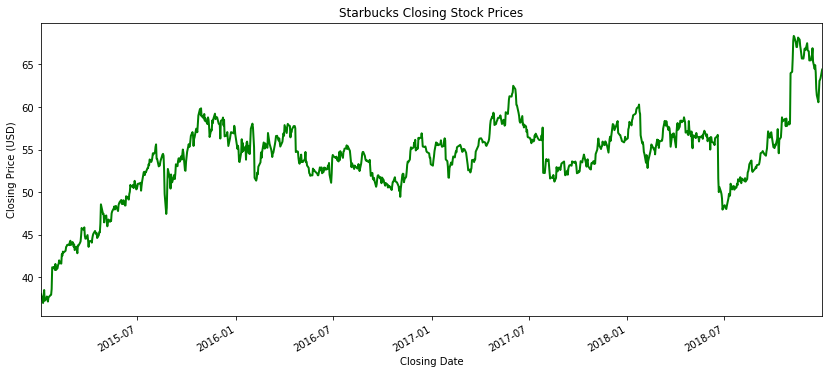

In [57]:
# Adding a title and axis labels
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(14,6),title=title,color='g',lw=2)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

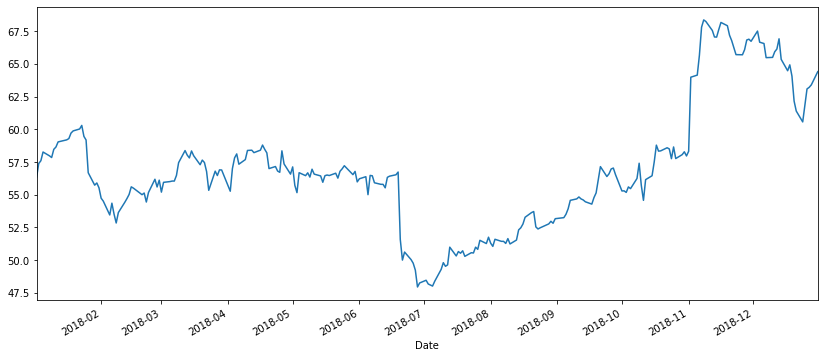

In [58]:
# Choosing X limits by Slice
df['Close']['2018-01-01':'2018-12-31'].plot(figsize=(14,6)).autoscale(axis='x',tight=True)

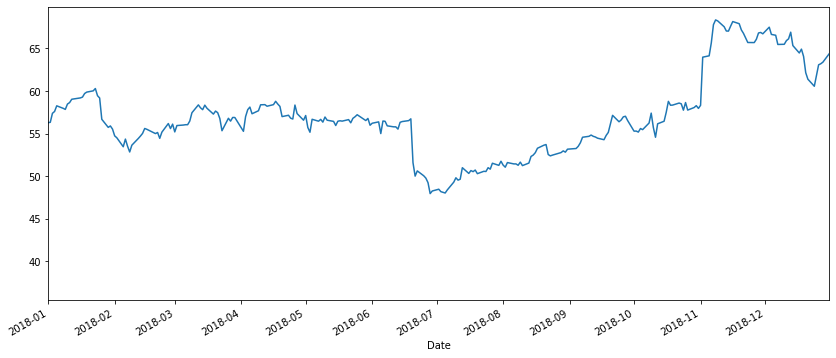

In [62]:
# Choosing X limits by argument
df['Close'].plot(figsize=(14,6),xlim=['2018-01-01','2018-12-31']).autoscale(axis='y')

In [63]:
# find the minimum value in range
df['Close']['2018-01-01':'2018-12-31'].min()

47.946999999999996

In [64]:
# find the maximum value in range
df['Close']['2018-01-01':'2018-12-31'].max()

68.35300000000001

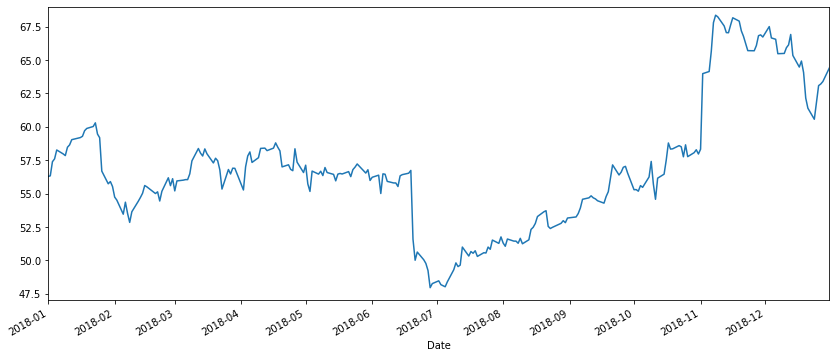

In [65]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(14,6),xlim=['2018-01-01','2018-12-31'],ylim=[47,69]);

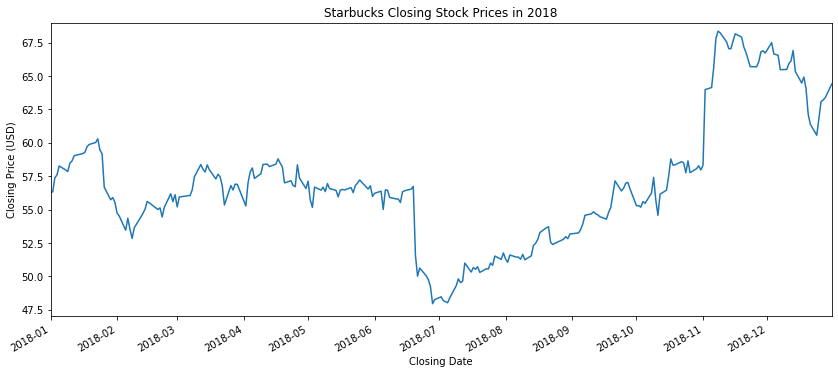

In [66]:
# Adding title and axis labels
title='Starbucks Closing Stock Prices in 2018'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2018-01-01','2018-12-31'],ylim=[47,69],figsize=(14,6),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

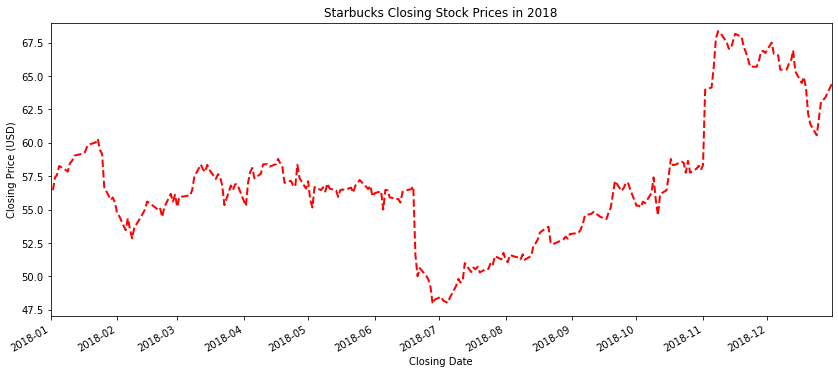

In [69]:
# Adding color and style
title='Starbucks Closing Stock Prices in 2018'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2018-01-01','2018-12-31'],ylim=[47,69],figsize=(14,6),title=title, c='r',ls='--',lw=2)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [70]:
# Change the format and appearance of dates along the x-axis
from matplotlib import dates

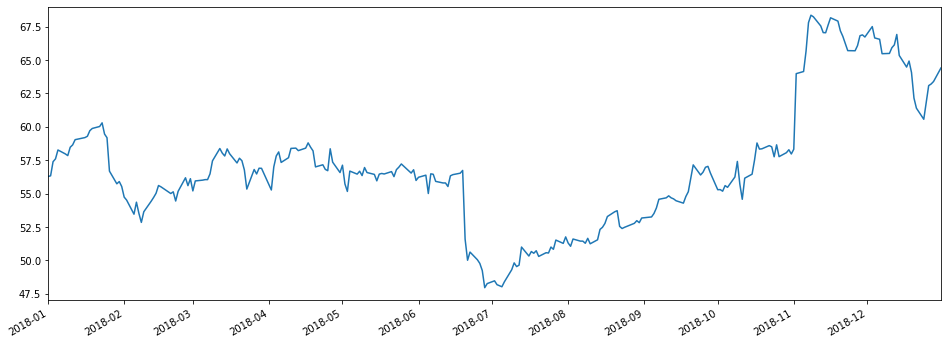

In [74]:
# Create axis object
ax = df['Close'].plot(figsize=(16,6),xlim=['2018-01-01','2018-12-31'],ylim=[47,69])

# Remove pandas defualt "Date" label
ax.set(xlabel='')

# set the tick locator and formatter for the major axis
ax.xaxis.set_major_locator(dates.MonthLocator())


### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  

In [75]:
# experiment
from datetime import datetime
datetime(2020, 5, 9, 14, 48, 5).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, May 09, 2020  02:48:05 PM'

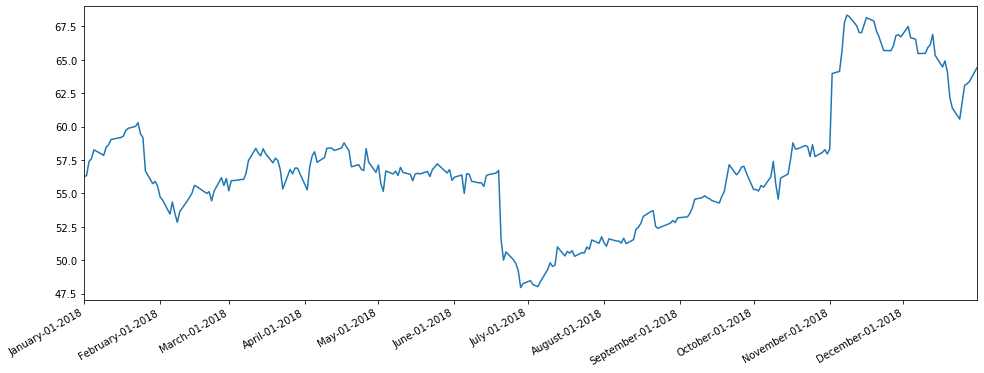

In [77]:
ax = df['Close'].plot(figsize=(16,6),xlim=['2018-01-01','2018-12-31'],ylim=[47,69])
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%d-%Y'))

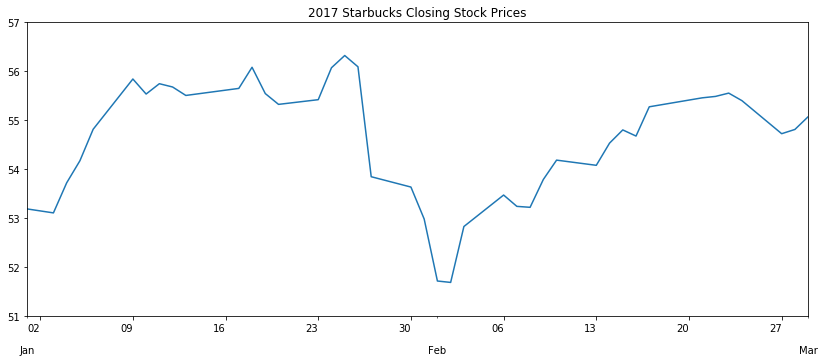

In [79]:
# Major vs. Minor axis values, passed a rotation argument rot=0 into df.plot() so that the major axis values appear horizontal, not slanted.
ax = df['Close'].plot(figsize=(14,6), xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

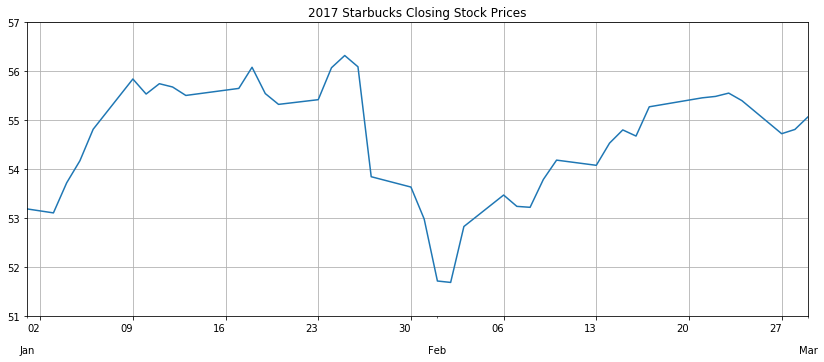

In [80]:
# adding gridlines
ax = df['Close'].plot(figsize=(14,6), xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)